<a href="https://colab.research.google.com/github/DataSayant1st/MachineLearning_and_AI/blob/main/Image_classification_WITH_Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification WITH Logistic Regression

####Tools featured - LIME

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

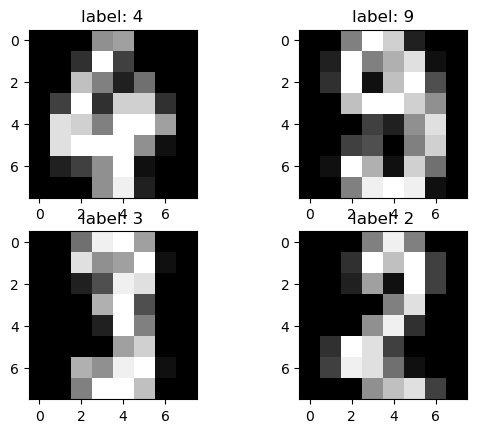

In [ ]:
# Creating random data

rands = [random.randint(0, digits.data.shape[0]) for i in range(4)]

# plt.rcParams['figure.constarined_layout.use'] = True

for i, sample in enumerate(rands):
    plt.subplot(2,2,i+1)
    plt.imshow(digits.data[sample].reshape((8,8)), cmap = 'gray')
    plt.title(f"label: {digits.target[sample]}")



In [ ]:
X = digits.data/digits.data.max()
y = digits.target

In [ ]:
digits.data.max()

16.0

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 19)
#test size is 25%

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(random_state = 32, max_iter = 1000, solver = "saga", penalty = 'l1')

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', random_state=32, solver='saga')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Confusion Matrix = let us see if our data / features have been correctly classified

In [ ]:
from sklearn import metrics


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 37,  1,  0,  0,  0,  0,  0,  3,  2],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 42,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 44,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  1,  0],
       [ 1,  2,  0,  1,  0,  1,  0,  0, 35,  1],
       [ 1,  1,  0,  0,  0,  2,  0,  0,  1, 43]], dtype=int64)

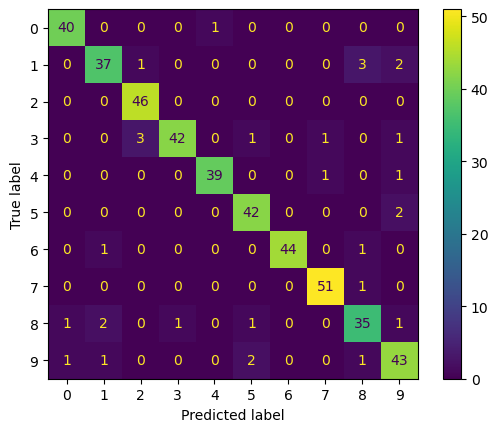

In [ ]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cnf_matrix)
disp.plot()

In [ ]:
# Apparently a lot of things were corrctly predicted

# How to interpete this matrix , the higher the value on the diagonal matrix, the truer the positives I guess

In [ ]:
from sklearn.metrics import classification_report

d_names = list(digits.target_names.astype(str))

report = classification_report(y_test, y_pred, target_names = d_names)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.90      0.86      0.88        43
           2       0.92      1.00      0.96        46
           3       0.98      0.88      0.92        48
           4       0.97      0.95      0.96        41
           5       0.91      0.95      0.93        44
           6       1.00      0.96      0.98        46
           7       0.96      0.98      0.97        52
           8       0.85      0.85      0.85        41
           9       0.86      0.90      0.88        48

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [ ]:
# now to see which features have the biggest impact on our model

<BarContainer object of 64 artists>

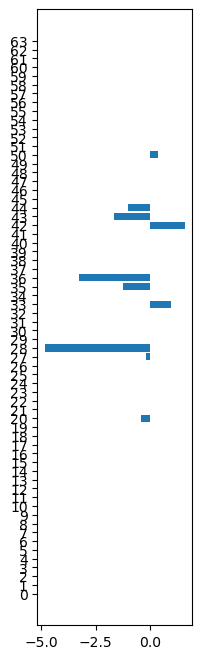

In [ ]:
import numpy as np

plt.figure(figsize = (2,8))

w_names = list(np.arange(0,64).astype(str))

plt.barh(w_names, model.coef_[0])

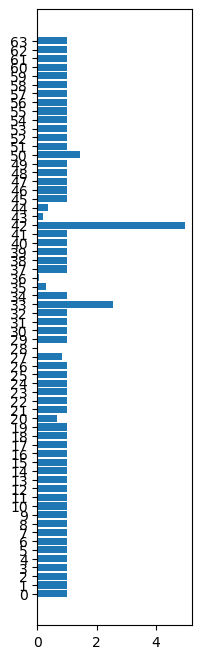

In [ ]:
plt.figure(figsize = (2,8))
plt.barh(w_names, np.exp(model.coef_[0]))
plt.show()

Text(0.5, 1.0, 'Prediction: 9, Actual: 9')

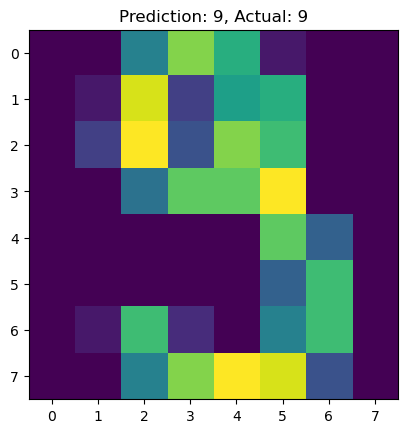

In [ ]:
sample_id = random.randint(0,digits.data.shape[0])
sample = digits.data[sample_id].reshape(1,-1)
prediction = model.predict(sample)

plt.imshow(sample.reshape((8,8)))
plt.title(f"Prediction: {prediction[0]}, Actual: {digits.target[sample_id]}")

In [ ]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

explainer = lime_image.LimeImageExplainer()

In [ ]:
def predict_fn(images):
    images = images[:,:,:,0]
    images = images.reshape(images.shape[0],[64])
    prob = model.predict_proba(images)

    return prob

In [ ]:
sample_rgb = sample.reshape((8,8))

In [ ]:
explanation = explainer.explain_instance(sample_rgb,predict_fn, top_labels = 5, hide_color = 0, num_samples = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:
temp, mask = explanation.get_image_and_mask(8, positive_only = True, num_features = 5, hide_rest = True)

NameError: name 'explanation' is not defined

In [ ]:
from skimage.segmentation import mark_boundaries

In [ ]:
plt.imshow(mark_boundaries(temp/2+0.5, mask))

NameError: name 'temp' is not defined